# Task 1 - Importing the libraries and datasets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf


In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Task 2 - Visualizing the datasets

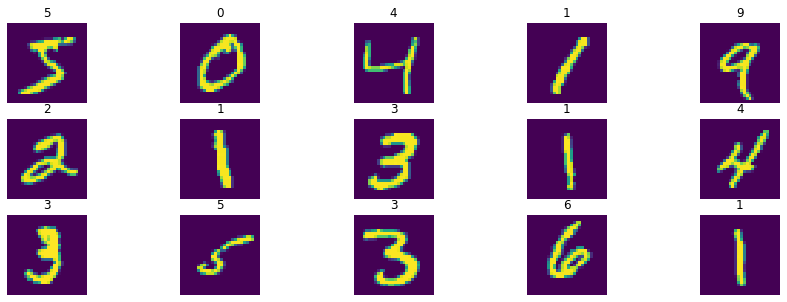

In [3]:
classes = ['0','1','2','3','4','5','6','7','8','9']
fig = plt.figure(figsize=(15,5))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1)
    ax.grid('off')
    ax.axis('off')
    ax.imshow(x_train[i])
    ax.set_title(classes[y_train[i]])
plt.show()

# Task 3 - Preprocessing the datasets

In [4]:
from keras.utils import to_categorical
x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

x_train_norm = x_train_reshaped/255
x_test_norm = x_test_reshaped/255
print(y_train_encoded.shape)

Using TensorFlow backend.


(60000, 10)


# Task 4 - Preparing the model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def make_model():
    model = Sequential()
    model.add(Dense(256,activation='relu',input_shape=(784,)))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    
    model.compile(
          loss = 'categorical_crossentropy',optimizer='adam',
          metrics = ['accuracy'])
    
    return model



In [6]:
model = make_model()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


# Task 5 - Training the model

In [55]:
model.fit(x_train_norm,y_train_encoded,epochs=3)
loss,accuracy = model.evaluate(x_test_norm,y_test_encoded)
print("Accuracy:{:.3f}".format(accuracy))
print("Loss:{:.3f}".format(loss))

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0164 - accuracy: 0.9947
Epoch 2/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0160 - accuracy: 0.9946
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.1034 - accuracy: 0.9796
Accuracy:0.980
Loss:0.103


# Task 6 - Final Prediction


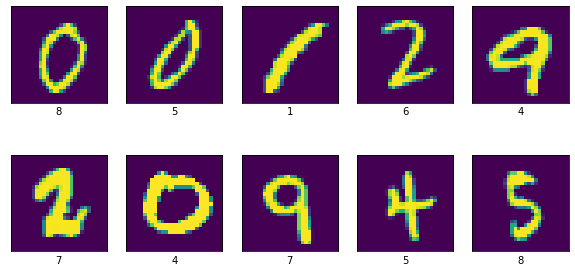

In [12]:
preds = model.predict(x_test_norm)
indices = np.random.choice(range(x_test.shape[0]),10,replace=False)
x = x_test[indices]
y = y_test[indices]
p = preds[indices]
fig = plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[np.argmax(p[i])])
    plt.imsave(str(i+50)+".png",x[i],cmap='gray')
plt.show()